# Running OpenDrift

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#000000; border-left: solid #000000 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Objective: </b> Run lagrangian release experiments using OpenDrift. </p>
<p style='margin-left:1em;'>
Opendrift.py contains Opendrift_run (class) that runs a particle release experiment with chosen particle dispersion parameters including multiple seeding times and/or locations habitat settlement type of model vertical parameters.
</p>
<p style='margin-left:1em;'>
Dec - 2023 | Mireya M. Montano | mireya.mmor@gmail.com
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>


## Extracting Data

As part of the Moana Project the data for the Bay of Plenty (region of study) is available through [THREDDS](http://thredds.moanaproject.org:6443/thredds/catalog/moana/catalog.html) server. Therefore we can just call the desired file providing the link.

In [1]:
import os

THREDDS_SERVER = "http://thredds.moanaproject.org:6443/thredds/dodsC/moana/"
BOP_HIS_PATH = f"BoP_1km/his/bop1km_v2_his_"

PATH = os.path.join(THREDDS_SERVER, BOP_HIS_PATH)

## Parameters for OpenDrift_run
### File/environment related parameters
With environment parameters I mean parameters that are not precisely related with OpenDrift but more so about the data to ingest. 
- file_path (str) - path of the file where the velocities are located. Make sure the files provided cover the full period of advection
- outdir (str) - path of the directory where to save the output
- id (str Optional) - identifier for the experiment. In case of running multiple experiments over the same dates with different parameters for example for experiments with no stranding parameter an id could be **ns**
- vars_dict (dict Optional) - Dictionary containing the names associated to the lon lat and mask variables within the file. ROMS example:
  - {"depth": "h" "time": "ocean_time"}

In [2]:
year = 2004
month = 1
m1 = "%02d" % month
m2 = "%02d" % (month + 1)
file_path = [f"{PATH}{year}{m1}.nc", f"{PATH}{year}{m2}.nc"]
outdir = os.path.join(os.getcwd(), "output")
vars_dict = {"depth": "h", "time": "ocean_time"}  # ROMS variable names

### Particle release and OpenDrift configuration parameters

In this portion we define the particle release and Opendrfit configuration related parameters. 
- log_level (int): Logging information for Opendrfit. Default: 50. 50 - No information 20 For a certain amount 0 for all the debugging
- opendrift_reader (str): Reader for the files see OpenDrift for more information. In this example we use "reader_ROMS_native_MOANA"
- opendrift_model (str): OpenDrift module to use. In this example we use "OceanDrift"
- number_of_particles (int): Number of particles to deploy per location
- cluster_std (int): For a Lagrangian analyses a cluster of particles is recommended. Therefore the defined number_of_particles is going to be released on a cluster with a defined deviation (cluster_std). This value depends on the model grid. Used in BoP experiment 0.003 (~3 km)
- random_depth (boolean or int): If True is going to release the particles in each location at random depths through the water column. If a number is given this will be the limit i.e. if 20 is given the particles are going to be released between the surface and 20 meters
- depth (boolean or int): If the user prefers to deploy all the particles at a specific depth this can also be done with defining random_depth as false and giving a value to depth instead.


<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#69337A; border-left: solid #805AD5 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
Regarding the release locations we provide two options: <b>release on isobath</b> or <b>release_locations</b>. One should be chosen.

- Release on isobath
<p style='margin-left:3em;'> With the release on isobath option, the user provides a desired isobath to follow for the releases as seen in Chapter 2 and 4 of Montano, 2023. </p>
<p style='margin-left:3em;'> With this option parameters such as spacing_locations, ignore_first and/or ignore_last must be provided </p>

- Release on location  
<p style='margin-left:3em;'> With this option, the user must provide the desired release locations. No limits. </p>
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

- release_on_isobath (int): If True the script is going to find locations along the given isobath (i.e. 200 will find locations along the 200 m isobath). Either this or release_locations should be provided
  - spacing_locations (int): If release on isobath is true define the spacing between locations this depends and type of the grid. Choose wisely.
  - ignore_first (int): Ignores the first (defined number) of locations given useful when using release on isobath. Default 0
  - ignore_last (int): Ignores the last (defined number) of locations given useful when using release on isobath. Default -1
- release_on_locations (tuple): If True it must contain the coordinates of the release locations. 

In [3]:
log_level = 50
opendrift_reader = "reader_ROMS_native"
opendrift_model = "OceanDrift"
id = "control"
number_of_particles = 10
cluster_std = 0.003
random_depth = 20

release_on_isobath = 65
spacing_locations = 20
ignore_first = 8
ignore_last = 9

- release_interval (int): Particle release interval in hours. Default 3
- advection_duration (int): Expected duration of advection of particles in seconds. Default (60x24x3600)
- max_speed (int): maximum speed particles are allowed to reach in m/s. Default 5
- horizontal_diffusivity (int): Particle release horizontal diffusivity. Default: 0.1
- advection_scheme (str): Advection scheme of the particle release. Default: "runge-kutta4"
- coastline_action (str): What happens to the particle when it reaches the coast. Default 'stranding'
- time_step_advection (int): Advection time step in seconds. Default 900 (15 minutes)
- time_step_output (int): Output time step in seconds. Default 3600x3 (Every 3 hours)

In [4]:
release_interval = 12
release_until = 5 * 24 * 3600  # only the first five days
advection_duration = (
    15 * 24 * 3600
)  # advection lasting for 30 days or after all particles have stranded
max_speed = 5
advection_scheme = "runge-kutta4"
horizontal_diffusivity = 0.1
time_step_advection = 900
time_step_output = 3600 * 3
coastline_action = "stranding"

<div class="warning" style='padding:0.1em; background-color:#FFFFFF; color:#CC5500; border-left: solid #FFA500 4px; border-radius: 4px; padding:0.7em;'>
<span>
<p style='margin-top:1em; text-align:rigth; margin-left:1em'>
<b>Note</b></p>
<p style='margin-left:1em;'>
The following parameters are not strictly necessary but there are some of the options that were used throughout the aforementioned Thesis
</p>
<p style='margin-bottom:1em; margin-right:1em; text-align:right; font-family:Georgia'>
</p></span>
</div>

### Vertical Motion Parameters
- vertical_motion (boolean): If True all the vertical parameters below should be provided. Default True
- vertical_diffusivity (int): Value for vertical diffusivity. Check with your hydrodynamic model. Default 0.001
- vertical_mixing_timestep (int): Vertical mixing timestep in seconds. Default 90

In [5]:
vertical_motion = True
vertical_diffusivity = 0.001
vertical_mixing_timestep = 90

### Behaviour Parameters
- behaviour (boolean): If True parameters such as maximum age minimum settlement age and maximum depth a particle can reach can be defined
- max_age_seconds (int): In seconds Default: None. Note make sure is less or the same as advection_duration
- min_settlemente_age (int): Minimum settlement age in seconds. Default 0
- maximum_depth (int): Maximum depth a particle can reach. Default False


### Habitat Parameters
- habitat (boolean or str) If True a path of the shapefile with the habitats must be provided.

### Other Parameters
- first_and_last_position (boolean) If True a text file containing the first and last position of the particles is given.


In [6]:
first_and_last_position = True

To run

In [7]:
import xarray as xr

ds = xr.open_mfdataset(file_path)

INFO:root:--- Creating output directory


--- OpenDrift Configuration set
--- Particles seeded from  00:00 01/01/2004 to  00:00 01/06/2004 every 12 hours
--- Finding release locations over the 65m isobath
--- 11 release locations identified over the 65m isobath
--- Number of release locations: 11
--- Particles released at random depths throughout from 20 to the surface


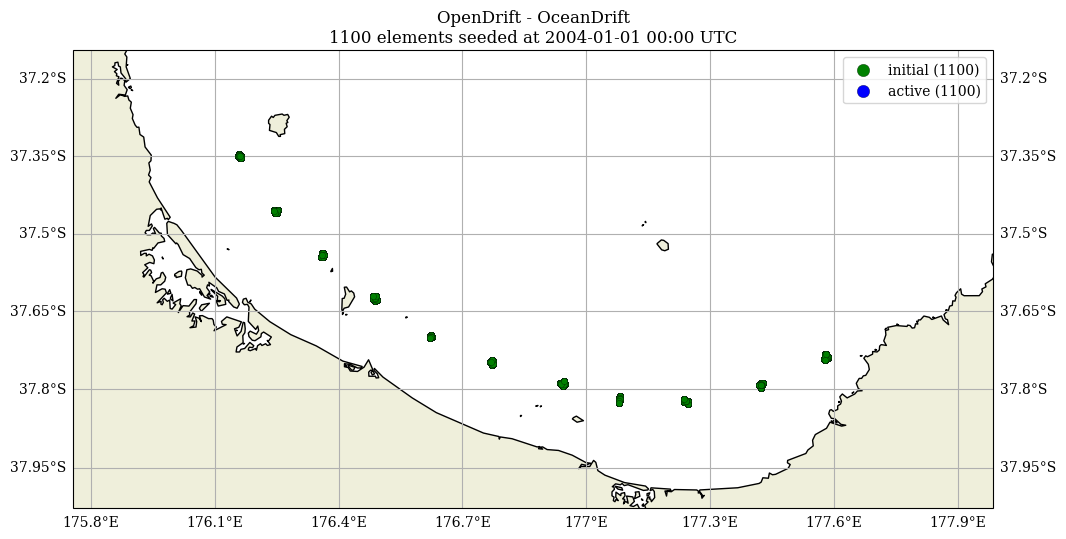

--- Particles seeded starting OpenDrift run
--- Saving first and last position file


In [8]:
from Lagrangian_Analyses.opendrift import opendrift_run

particle_experiment = opendrift_run(
    file_path=[f"{PATH}{year}{m1}.nc", f"{PATH}{year}{m2}.nc"],
    outdir=os.path.join(os.getcwd(), "output"),
    vars_dict=vars_dict,
    id=id,
    log_level=log_level,
    opendrift_reader=opendrift_reader,
    opendrift_model=opendrift_model,
    number_of_particles=number_of_particles,
    cluster_std=cluster_std,
    random_depth=random_depth,
    release_on_isobath=release_on_isobath,
    spacing_locations=spacing_locations,
    ignore_first=ignore_first,
    ignore_last=ignore_last,
    release_interval=release_interval,
    release_until=release_until,
    advection_duration=advection_duration,
    max_speed=max_speed,
    advection_scheme=advection_scheme,
    horizontal_diffusivity=horizontal_diffusivity,
    time_step_advection=time_step_advection,
    time_step_output=time_step_output,
    coastline_action=coastline_action,
    vertical_motion=vertical_motion,
    vertical_diffusivity=vertical_diffusivity,
    vertical_mixing_timestep=vertical_mixing_timestep,
    first_and_last_position=first_and_last_position,
)
particle_experiment.run()

### Output files:
- "%yyyy%mm_Particles_{id}.nc" (netCDF) OpenDrift Output. File containing lat lon z trajectory status age_seconds and origin_marker associated to each released particle.
  
*Optional*:
- "%yyyy%mm_Particles_{id}.txt" (.txt) File containing the initial (lon, lat), final (lon, lat) coordinates and final status of the released particles. (stranded, active, dead)